In [1]:
# loading django and settings from django

import os
import django
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'text_processeing_engine.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()
from django.db.models import Q

In [2]:
# fetching the documents from database and filtering it out for the documents that has atleast one type associated 
# and has relevant tag set to true.

from document_processing_api.models.file import File
total_related_document_distinct = File.objects.filter(types__gt = 0, is_relevant = True).distinct()
print(len(total_related_document_distinct))

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


1683


In [3]:
# filter out the docs specific to every document types 

electricity = total_related_document_distinct
fuel = total_related_document_distinct
water = total_related_document_distinct
material = total_related_document_distinct
d_heating = total_related_document_distinct
waste = total_related_document_distinct
commuting = total_related_document_distinct
mobility = total_related_document_distinct
for type in [1,2,4,6,7,8,9]:
    electricity = electricity.exclude(types__id__icontains=type) #5
for type in [5,1,4,6,7,8,2]:
    mobility = mobility.exclude(types__id__icontains=type) #9
for type in [5,2,4,6,7,8,9]:
    fuel = fuel.exclude(types__id__icontains=type) #1
for type in [5,1,4,6,7,8,9]:
    material = material.exclude(types__id__icontains=type) #2
for type in [5,1,9,6,7,8,2]:
    water = water.exclude(types__id__icontains=type) #4  
for type in [5,1,9,6,4,8,2]:
    waste = waste.exclude(types__id__icontains=type) #7  
for type in [5,1,9,7,4,8,2]:
    d_heating = d_heating.exclude(types__id__icontains=type) #6  
for type in [5,1,9,7,4,6,2]:
    commuting = commuting.exclude(types__id__icontains=type) #8

In [4]:
# print length of every document
print(len(electricity))
print(len(fuel))
print(len(material))
print(len(mobility))
print(len(water))
print(len(waste))
print(len(d_heating))
print(len(commuting))

244
607
16
39
27
66
2
33


In [5]:
# creating training and test queryset randomly, taking 80% as training set and only 20% as test set.

from sklearn.model_selection import train_test_split

e_train, e_test =  train_test_split(list(electricity), test_size=0.2, random_state=0)
f_train, f_test =  train_test_split(list(fuel), test_size=0.2, random_state=0)
m_train, m_test =  train_test_split(list(material), test_size=0.2, random_state=0)
mb_train, mb_test =  train_test_split(list(mobility), test_size=0.2, random_state=0)
wt_train, wt_test =  train_test_split(list(water), test_size=0.2, random_state=0)
ws_train, ws_test =  train_test_split(list(waste), test_size=0.2, random_state=0)
dh_train, dh_test =  train_test_split(list(d_heating), test_size=0.2, random_state=0)
c_train, c_test =  train_test_split(list(commuting), test_size=0.2, random_state=0)

train_queryset = e_train + f_train + m_train + mb_train + wt_train + ws_train + dh_train + c_train 
print(len(train_queryset))

test_queryset = e_test + f_test + m_test + mb_test + wt_test + ws_test + dh_test + c_test
print(len(test_queryset))

823
211


In [6]:
# code for reference in case stopwords from nltk does not work, run this
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download('stopwords')
# nltk.download('punkt')

In [7]:
#data preprocessing

# libraries for data pre processing
# since we are dealing with german documents so we to work with german langauage 



#spacy is used because its been widely used and has a lot of stop words , we will later combine the stop
# words with nltk stop words to make a better filter , lets prepare the stop words 


# pip install -U spacy
# pip install -U pip setuptools wheel

# spacy.cli.download('de_core_news_md')

import spacy
nlp_de_md = spacy.load('de_core_news_md')  # loading german language module from spacy
stop_words_de_md = nlp_de_md.Defaults.stop_words # getting stop words from spacy 
stop_words_de_md.add('a')
stop_words_de_md.add('e')
stop_words_de_md.add('i')
stop_words_de_md.add('o')
stop_words_de_md.add('u')
stopword_list_spacy = list(stop_words_de_md)

import nltk
from nltk.corpus import stopwords
#getting stop words from nltk and adding a few more general words

stopwords_list_nltk = stopwords.words('german') + ['r', 'all', 'ber', 'fr', 'jed', 'jen', 'knnen', 'knnte', 'manch','solch', 'sollen', 'weit', 'welch', 'whrend', 'wrde', 'wrden','and', 'derselb', 'eur', 'geg', 'hint', 'ind', 'konn', 'mach', 'musst', 'ohn', 'selb', 'sond', 'unt', 'werd', 'wied', 'woll', 'zwisch', 'allerding', 'allgemein', 'auss', 'ausserd', 'beid', 'bekenn', 'bereit', 'besond', 'bish', 'dafur', 'dageg', 'dah', 'dahint', 'damal', 'daneb', 'darub', 'darunt', 'daselb', 'dazwisch', 'dementsprech', 'demgegenub', 'demgemass', 'demzufolg', 'derjen', 'dermass', 'desweg', 'dritt', 'durf', 'eig', 'einand', 'einmalein', 'end', 'entwed', 'fruh', 'funf', 'funft', 'fur', 'geb', 'gegenub', 'geh', 'gerad', 'geschweig', 'heiss', 'heut', 'imm', 'infolgedess', 'kenn', 'klein', 'komm', 'leid', 'lieb', 'mog', 'moglich', 'morg', 'nachd', 'natur', 'neb', 'nehm', 'neu', 'neunt', 'off', 'sag', 'sech', 'seh', 'seitd', 'sieb', 'siebent', 'siebt', 'sowi', 'spat', 'trotzd', 'uber', 'uberhaupt', 'ubrig','vergang', 'viert', 'wahrend', 'wahrendd', 'wahrenddess', 'wenigst', 'zehnt', 'zunach', 'zuruck', 'zusamm', 'zweit']
stop_words = set(stopword_list_spacy + stopwords_list_nltk)
print(len(stop_words))

686


In [8]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [8]:
# function for noise removal and handeling capitalization
# remove special characters, digits and patterns ands return all text in lowercase
import unicodedata
import re


def noise_removal(text):
    pattern = r'[^a-zA-z\s]'
    special_char_pattern = re.compile(r'([{.(-)!\}]) ')
    text = special_char_pattern.sub(" \\1 ", text)
    text = re.sub(pattern, '', text)
    text = re.sub(r'[\[|\\|\]|\r|\n|\r\n|\s|\r\s|\r\x0c]+', ' ',text)
    text = text.replace("_","")
#   text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text.lower()


# def noise_removal(text):
#     rules = [
#         {r'>\s+': u'>'},  # remove spaces after a tag opens or closes
#         {r'\s+': u' '},  # replace consecutive spaces
#         {r'\s*<br\s*/?>\s*': u'\n'},  # newline after a <br>
#         {r'</(div)\s*>\s*': u'\n'},  # newline after </p> and </div> and <h1/>...
#         {r'</(p|h\d)\s*>\s*': u'\n\n'},  # newline after </p> and </div> and <h1/>...
#         {r'<head>.*<\s*(/head|body)[^>]*>': u''},  # remove <head> to </head>
#         {r'<a\s+href="([^"]+)"[^>]*>.*</a>': r'\1'},  # show links instead of texts
#         {r'[ \t]*<[^<]*?/?>': u''},  # remove remaining tags
#         {r'^\s+': u''},  # remove spaces at the beginning
#         {r'[^a-zA-z\s]': u''},
# #         {r'([{.(-)!\}]) ': " \\1 "},
# #         {r'[\r|\n|\r\n|\s|\r\s|\r\x0c]+':u''},
#     ]
#     for rule in rules:
#         for (k, v) in rule.items():
#             regex = re.compile(k)
#             text = regex.sub(v, text)
#     text = text.replace("_","")
# #     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
# #     text = text.rstrip()
#     return text.lower()



In [16]:
# remove stop words:

def remove_stop_words(doctext):
    
    text = noise_removal(doctext)
    my_doc = nlp_de_md(text)
    text = ' '.join([str(token) for token in my_doc if not str(token) in stop_words])
    return text

In [17]:
# # remove stop words:
# from spellchecker import SpellChecker
# gemranspell = SpellChecker(language='de')

# def remove_stop_words(doctext):
    
#     text = noise_removal(doctext)
# #     text1 = text.split()
# #     misspelled = list(gemranspell.unknown(text1))
# #     text = []
# #     for t in text1:
# #         text.append( t if not t in misspelled else gemranspell.correction(t))
# #     text = ' '.join(text) 
#     my_doc = nlp_de_md(text)
#     text = ' '.join([str(token) for token in my_doc if not str(token) in stop_words])
#     return text

In [18]:
# from spellchecker import SpellChecker
# gemranspell = SpellChecker(language='de')
# text = noise_removal(train_queryset[1].text)
# my_doc = nlp_de_md(text)
# my_doc
# # misspelled = list(gemranspell.unknown(my_doc))
# # doc = []
# # for t in my_doc:
# #     doc.append( t if not str(t) in misspelled else gemranspell.correction(str(t)))


In [22]:
from spellchecker import SpellChecker
gemranspell = SpellChecker(language='de')
def spellchecker(doctext):
    text = noise_removal(doctext)
    text1 = text.split()
    misspelled = list(gemranspell.unknown(text1))
    text = []
    for t in text1:
        text.append( t if not t in misspelled else gemranspell.correction(t))
    text = ' '.join(text)
    return text

In [21]:
# preparing data for tf-idf 
# training set data 
text_training_set = [remove_stop_words(doc.text) for doc in train_queryset]
hash_training_set = [doc.id for doc in train_queryset]
existing_types_training_set =  [doc.type_names[0] for doc in train_queryset]


#testing set data
text_test_set = [remove_stop_words(doc.text) for doc in test_queryset]
hash_test_set = [doc.id for doc in test_queryset]
existing_types_test_set =  [doc.type_names[0] for doc in test_queryset]

# now we have array of text cleaned for all the documents for training and test set , apart from that we colleted other 
# info such as doc hash and exisiting types allocated into other arrays.

In [23]:
#saving data for github code
# import numpy as np
# with open("testing.txt", "w") as txt_file:
#     txt_file.write("text array from test set" + "\n\n")
#     for line in text_test_set:
#         txt_file.write("".join(line)+ "," + "\n")
#     txt_file.write("\n\n\n\n\n")
#     txt_file.write("hash from test set" + "\n\n")
#     for line in hash_test_set:
#         txt_file.write("".join(line)+ "," + "\n") 
#     txt_file.write("\n\n\n\n\n")
#     txt_file.write("exisitng types for test set" + "\n\n")
#     for line in existing_types_test_set:
#         txt_file.write("".join(line)+ "," + "\n")

In [24]:
# tokenizer , tokenizer and stemmer 

def tokenzier(text):
#     text = remove_stop_words(text)
    my_doc = nlp_de_md(text)
    tokens = [token.lemma_ for token in my_doc]
    return tokens

#importing german stemmer from nltk
from nltk.stem.snowball import GermanStemmer
stemmer = GermanStemmer()

def tokenzier_and_stemmer(text):
#   text = remove_stop_words(text)
    my_doc = nlp_de_md(text)
    tokens = [token.lemma_ for token in my_doc]
    tokens_stemmed = [stemmer.stem(t) for t in tokens]
    return tokens_stemmed

In [25]:
# so the models wont understand text but they understand number , we will convert our text to train model into tf-idf.

# pip install -U scikit-learn
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# we are using 3 ngrams it helps create more features and text does not loose meaning
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words=stop_words,
                                 use_idf=True, tokenizer=tokenzier_and_stemmer, ngram_range=(1,3))

tf_idf_train = tfidf_vectorizer.fit_transform(text_training_set)
tf_idf_norm_train = normalize(tf_idf_train)
tf_idf_array_train = tf_idf_norm_train.toarray()

print(tf_idf_array_train.shape)

#dimension reduction through pca
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)  # since the data has to be plotted into 2d planes
Y_sklearn_pca_train = sklearn_pca.fit_transform(tf_idf_array_train)


/Users/vikrant/text-processing-engine/env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['derj'] not in stop_words.
  warnings.warn(


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.05832494 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
print(Y_sklearn_pca_test.shape)

(211, 2)


In [28]:
#lets prepare this for test data also
tf_idf_test = tfidf_vectorizer.transform(text_test_set) # we used the fitted transform to 
tf_idf_norm_test = normalize(tf_idf_test)
tf_idf_array_test = tf_idf_norm_test.toarray()
Y_sklearn_pca_test = sklearn_pca.transform(tf_idf_array_test)

In [35]:
print(tf_idf_train.shape)
print(tf_idf_array_test.shape)
# there are 175 features extracted and 823 documents text has been mapped with all the features inthe form of matrix,
#  we are all ready for the cluster algos 

(823, 174)
(211, 174)


In [30]:
terms = tfidf_vectorizer.get_feature_names_out()
print(terms) #all the features that are extracted from text
print(len(terms))

['  ' '   total' 'agip' 'amtsgericht' 'aral' 'bank' 'bay' 'bay gmbh'
 'bay gmbh co' 'betrag' 'bic' 'bitt' 'brutto' 'brutto netto' 'card'
 'card no' 'card no kund' 'cng' 'cng lng' 'cng lng kg' 'co' 'co kg' 'cokg'
 'd' 'd rating' 'd rating telefax' 'datum' 'de' 'deutschland' 'diesel'
 'diesel ltr' 'disseldorf' 'dkv' 'dkv euro' 'dkv euro servic' 'egrima'
 'egrima mbh' 'egrima mbh sitz' 'einheit' 'energi' 'energienetz'
 'energienetz bay' 'energienetz bay gmbh' 'erdgas' 'erdgas cng'
 'erdgas cng lng' 'esso' 'euro' 'euro servic' 'euro servic gmbh'
 'euro sup' 'euro sup ltr' 'f' 'fax' 'fir' 'fir leistung'
 'fir leistung liefer' 'frankenthal' 'frankenthal str' 'gesamtwert'
 'geschaftsfiihr' 'gesellschafterin' 'gmbh co' 'gmbh co kg' 'gmbh cokg'
 'haftend' 'haftend gesellschafterin' 'hra' 'hrb' 'iban' 'id' 'jrme'
 'jrme lejeun' 'jrme lejeun sven' 'kalleve' 'kalleve pet'
 'kalleve pet meier' 'kg' 'kund' 'kund id' 'kundendat'
 'kundendat energienetz' 'kundendat energienetz bay' 'kundennumm'
 'kuus

In [110]:
# we will use this in ward method
from sklearn.metrics.pairwise import cosine_similarity
dist_1 = 1 - cosine_similarity(tf_idf_array_train)
print(dist)

[[0.00000000e+00 1.82507271e-01 3.85976882e-01 ... 4.83871583e-01
  8.46790393e-01 3.68650262e-01]
 [1.82507271e-01 0.00000000e+00 9.52622265e-01 ... 1.07136691e+00
  1.44389148e+00 9.30515792e-01]
 [3.85976882e-01 9.52622265e-01 1.11022302e-16 ... 7.05116366e-03
  1.25956279e-01 2.45185285e-04]
 ...
 [4.83871583e-01 1.07136691e+00 7.05116366e-03 ... 0.00000000e+00
  7.45251719e-02 9.91952788e-03]
 [8.46790393e-01 1.44389148e+00 1.25956279e-01 ... 7.45251719e-02
  0.00000000e+00 1.36928676e-01]
 [3.68650262e-01 9.30515792e-01 2.45185285e-04 ... 9.91952788e-03
  1.36928676e-01 0.00000000e+00]]


In [37]:
# lets start with kmeans 

from sklearn.cluster import KMeans

num_clusters = 7

km_model = KMeans(n_clusters=num_clusters, max_iter=600, algorithm = 'auto')
# %time km_model.fit(tf_idf_array_train)
%time km_model.fit(Y_sklearn_pca_train)
clusters_train = km_model.labels_.tolist()
kmeans_predict_train = km_model.predict(Y_sklearn_pca_train)
kmeans_predict_test = km_model.predict(Y_sklearn_pca_test)
print(kmeans_predict_test)

CPU times: user 284 ms, sys: 42.5 ms, total: 326 ms
Wall time: 68.1 ms
[6 6 6 2 5 2 6 1 2 1 3 2 1 2 1 5 1 2 5 2 6 2 1 6 2 1 1 1 1 5 3 1 6 1 5 1 5
 1 5 5 1 6 1 1 1 5 2 5 6 1 1 2 0 5 5 0 0 0 3 3 2 0 0 0 0 1 0 2 4 1 0 0 2 0
 2 0 0 0 0 0 2 0 0 4 4 0 2 0 0 0 0 5 0 4 2 4 0 1 0 0 0 5 4 2 0 2 0 6 0 4 0
 0 1 4 5 0 5 0 3 0 3 4 0 5 0 2 5 0 4 0 0 0 0 0 2 2 4 3 0 5 5 0 6 0 1 4 0 5
 0 5 0 0 4 2 5 0 4 1 0 0 4 5 1 0 0 4 2 0 1 0 0 1 6 1 1 1 1 6 1 1 1 1 1 5 2
 5 1 1 1 5 5 5 1 1 6 1 6 5 5 5 6 5 1 1 1 6 5 1 1 1 5]


In [ ]:
# funnction to create dataframe for test and training data per 

In [39]:
#conut of documents put into differnt clusters for training and test set
print(frame_training_set['clusters'].value_counts())
print(frame_test_set['clusters'].value_counts())

0    228
1    179
5    139
2    110
4     77
6     61
3     29
Name: clusters, dtype: int64
0    60
1    50
5    35
2    26
6    17
4    16
3     7
Name: clusters, dtype: int64


In [40]:
frame_training_set[frame_training_set.clusters == 1]

,title,clusters,existing_types
1,34c317e6e1cb6eefdc57e6fd30217eb210068c8eadb586...,1,Electricity
1,17e88b257653c61df57daf7a20aa3af659d11a41d35576...,1,Electricity
1,ea7431eb41cad415cc69a20eff18be8486127ee1c6cf1f...,1,Electricity
1,88d5b51f88c9881c5fc306665770e941836fa8d515c837...,1,Electricity
1,fee85fb4991f8231abad721517d8cca4eaf21ac4c361c9...,1,Electricity
...,...,...,...
1,e8394cd95740d74522a3379cbda61c4523ed9454276466...,1,Commuting
1,94703c810ef611a96390b0caf3b9205bf1a36c84c3cf00...,1,Commuting
1,5114f97706e6a79c758ac82d41022ca022ee384d4628f8...,1,Commuting
1,b1d0069590fa48efdf88dfbcf98f1b5f3956606ddb1a29...,1,Commuting


In [41]:
frame_test_set[frame_test_set.clusters == 1]


,title,clusters,existing_types
1,ab75d029c8c7c2196ac054870eed1f42205f9725cdbaaa...,1,Electricity
1,c200497e714164da37fb4d93afc85acea119f0030a2eb8...,1,Electricity
1,24d6a1936929a19c025a1260ebe7c528f2fa669a8c8e1b...,1,Electricity
1,cd9d71345eeb6c43bf295af1537d93148153ec49bf16f9...,1,Electricity
1,4bb0e6e954c4d8438c238a6060fd6ea777bfc9b425c258...,1,Electricity
1,5443a4dabb78aad7fbfffc33a7fdc1db7baf0de0e5b22f...,1,Electricity
1,3a48b7630db7318f874877d9fc27406b8c8900ead83333...,1,Electricity
1,7f0bb34c2996a36f5bc775b65c5091a88483f494c23e2e...,1,Electricity
1,9882297b5f673da5e0bd7ad03804135dabce6e0361a04d...,1,Electricity
1,beb6e353db2b826dd8a03d7228152ba66792a512ee847c...,1,Electricity


In [42]:
# lets create a vocab and see how many words with n-gram =1-3 created vocab word
# not needed yet
def create_vocab_df(dataset):
    vocab_tokenized = []
    vocab_stemmed = []
    for i in dataset:
        allwords_token = tokenzier(i) #for each item in 'text', tokenize/stem
        vocab_tokenized.extend(allwords_token) #extend the 'totalvocab_tokenized' list
        allwords_stemmed = tokenzier_and_stemmer(i) #for each item in 'text', tokenize/stem
        vocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    return pd.DataFrame({'words': vocab_tokenized}, index = vocab_stemmed)


vocab_frame_training = create_vocab_df(text_training_set)
vocab_frame_test = create_vocab_df(text_test_set)

In [43]:
# not needed yet
print(vocab_frame_training.shape[0]) #total words in training set  with ngram 1-3
print(vocab_frame_test.shape[0]) #total words in test set with ngram 1-3

137371
35554


In [44]:
import matplotlib
from matplotlib import pyplot

In [45]:
# order_centeroids = km_model.cluster_centers_.argsort()[:, ::-1]

In [46]:
# order_centeroids

In [47]:
# print top terms/featuers per cluster depends upon input considerig n-gram

def get_features_name(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tfidf_vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [189]:
def print_feature_names(df):
    for i in range(len(df)):
        print("Cluster %d words:" % i , '\n' , list(df[i].features) , '\n')

In [194]:
df_train = get_features_name(tf_idf_array_train,clusters_train,20)
print_feature_names(df_train)

Cluster 0 words: 
 ['ltr', 'cng', 'erdgas cng', 'erdgas', 'lng', 'cng lng', 'erdgas cng lng', 'diesel', 'total', 'vehicl', 'no kund', 'card no', 'card no kund', 'no', 'kund id', 'no kund id', 'card', 'diesel ltr', 'euro', 'lng kg'] 

Cluster 1 words: 
 ['energi', '  ', 'datum', 'f', 'fax', 'netto', 'bitt', 'de', 'd', 'fir', 'betrag', 'kund', 'miinch', 'brutto', 'munch', 'rechnung', 'p', 's', 'euro', 'zahlung'] 

Cluster 2 words: 
 ['gmbh co kg', 'co kg', 'gmbh co', 'co', 'kg', 'mwst', 'deutschland', 'nr', 'total', 'bay gmbh co', 'energienetz', 'energienetz bay', 'bay', 'energienetz bay gmbh', 'bay gmbh', 'bank', 'bic', 'de', 'frankenthal', 'rechnung'] 

Cluster 3 words: 
 ['erdgas', 'erdgas cng', 'cng', 'p', 'kg', 'euro', 'no', 'rating', 'servic', 'dkv', 'ltr', 'bay', 'munch', 'bay gmbh', 'netto', 'total', 'ust', 'brutto netto', 'energienetz bay gmbh', 'energienetz bay'] 

Cluster 4 words: 
 ['betrag', 'de', 'diesel', 'netto', 'summ', 'esso', 'produkt', 'preis', 'datum', 'netto netto',

In [195]:
df_test = get_features_name(tf_idf_array_test,kmeans_predict_test,25)

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

def print_words_with_score(df):
    for i in range(len(df)):
        print("Cluster %d words:" % i , '\n' , list(df[i].features) , '\n')
        x = df[i].features
        y = df[i].score
        plt.figure()
        pyplot.title("Cluster %d words:" % i)
        plt.xlabel("score")
        plt.ylabel('words')
        plt.barh(x, y)

Cluster 0 words: 
 ['ltr', 'cng', 'erdgas cng', 'erdgas', 'lng', 'cng lng', 'erdgas cng lng', 'diesel', 'total', 'vehicl', 'no kund', 'card no', 'card no kund', 'no', 'kund id', 'no kund id', 'card', 'diesel ltr', 'euro', 'lng kg'] 

Cluster 1 words: 
 ['energi', '  ', 'datum', 'f', 'fax', 'netto', 'bitt', 'de', 'd', 'fir', 'betrag', 'kund', 'miinch', 'brutto', 'munch', 'rechnung', 'p', 's', 'euro', 'zahlung'] 

Cluster 2 words: 
 ['gmbh co kg', 'co kg', 'gmbh co', 'co', 'kg', 'mwst', 'deutschland', 'nr', 'total', 'bay gmbh co', 'energienetz', 'energienetz bay', 'bay', 'energienetz bay gmbh', 'bay gmbh', 'bank', 'bic', 'de', 'frankenthal', 'rechnung'] 

Cluster 3 words: 
 ['erdgas', 'erdgas cng', 'cng', 'p', 'kg', 'euro', 'no', 'rating', 'servic', 'dkv', 'ltr', 'bay', 'munch', 'bay gmbh', 'netto', 'total', 'ust', 'brutto netto', 'energienetz bay gmbh', 'energienetz bay'] 

Cluster 4 words: 
 ['betrag', 'de', 'diesel', 'netto', 'summ', 'esso', 'produkt', 'preis', 'datum', 'netto netto',

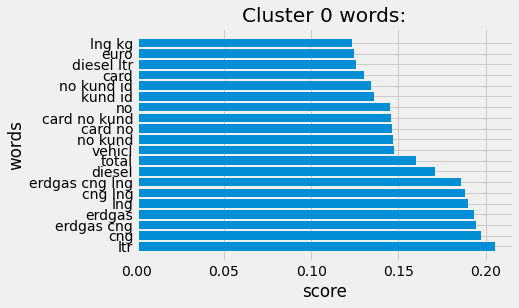

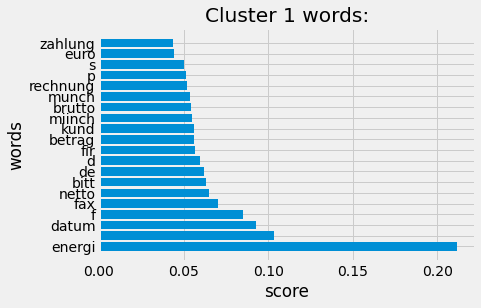

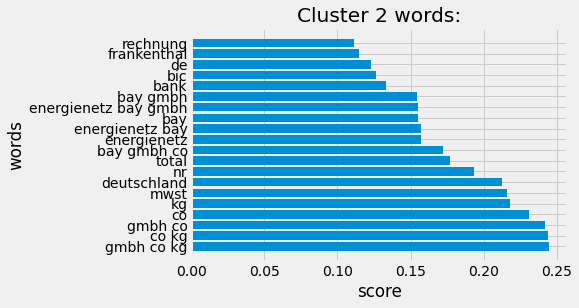

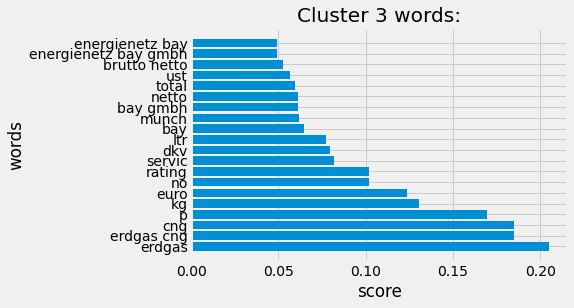

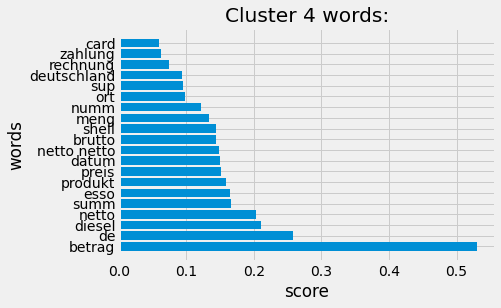

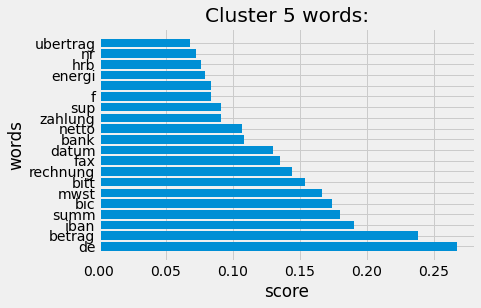

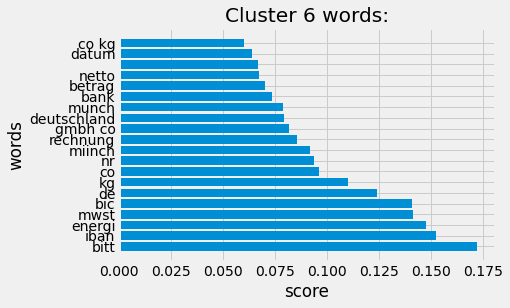

In [206]:
# printing no of top features for training set
print_words_with_score(df_train)

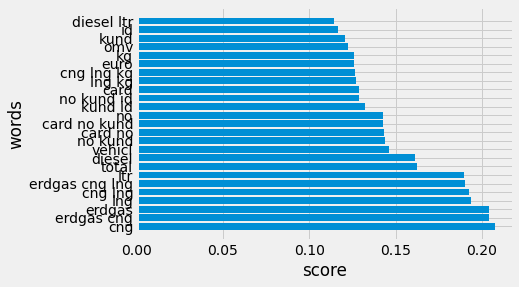

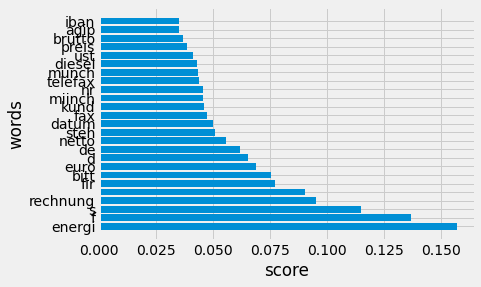

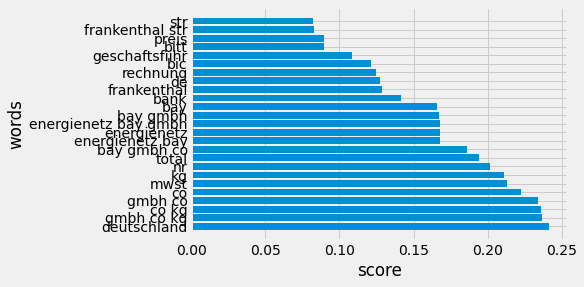

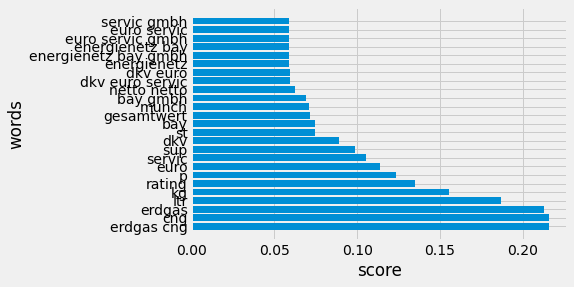

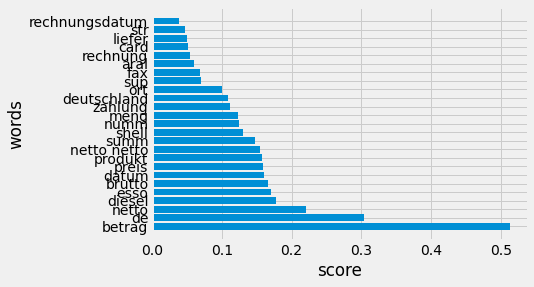

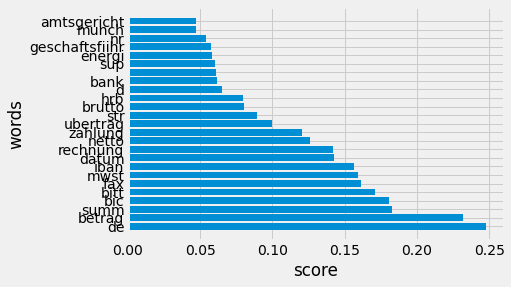

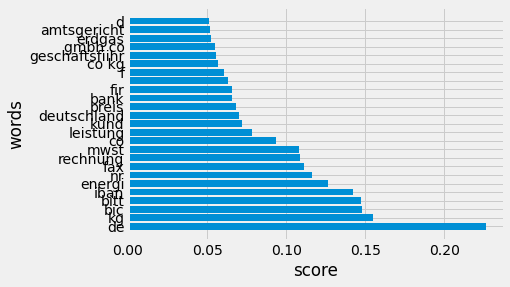

In [65]:
# printing no of top features for training set
print_words_with_score(df_test)

In [86]:
#print clusters in a graph
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)

def print_clusters(Y_sklearn_pca, prediction, model, center=True):
#     sklearn_pca = PCA(n_components = 2)
#     Y_sklearn_pca = sklearn_pca.fit_transform(tf_idf_array)
    plt.scatter(Y_sklearn_pca[:, 0], Y_sklearn_pca[:, 1], c=prediction, s=50, cmap='viridis')
    if center == True:
        centers = model.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1],c='red', s=300, alpha=0.6)

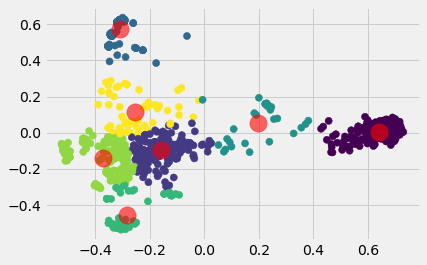

In [87]:
#print train kmeans
print_clusters(Y_sklearn_pca_train,kmeans_predict_train, km_model, center=True )

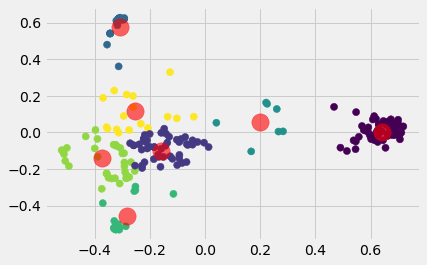

In [88]:
#print test kmeans
print_clusters(Y_sklearn_pca_test,kmeans_predict_test, km_model )

Cluster 0 words: 
 ['erdgas', 'cng', 'erdgas cng', 'kg', 'p', 'no', 'bay', 'ltr', 'rating', 'bay gmbh', 'munch', 'servic', 'euro', 'total', 'energienetz bay gmbh', 'energienetz bay', 'energienetz', 'sup', 'dkv', 'netto'] 

Cluster 1 words: 
 ['ltr', 'cng', 'erdgas cng', 'erdgas', 'lng', 'cng lng', 'erdgas cng lng', 'diesel', 'total', 'vehicl', 'no kund', 'card no', 'card no kund', 'no', 'kund id', 'no kund id', 'card', 'diesel ltr', 'euro', 'lng kg'] 

Cluster 2 words: 
 ['gmbh co kg', 'co kg', 'gmbh co', 'co', 'kg', 'mwst', 'deutschland', 'nr', 'total', 'bay gmbh co', 'energienetz', 'energienetz bay', 'bay', 'energienetz bay gmbh', 'bay gmbh', 'bank', 'bic', 'de', 'frankenthal', 'rechnung'] 

Cluster 3 words: 
 ['betrag', 'de', 'diesel', 'netto', 'esso', 'preis', 'produkt', 'netto netto', 'shell', 'summ', 'brutto', 'meng', 'datum', 'numm', 'ort', 'sup', 'deutschland', 'aral', 'nr', 'rechnung'] 

Cluster 4 words: 
 ['bic', 'bitt', 'mwst', 'kg', 'iban', 'de', 'co', 'gmbh co', 'munch', '

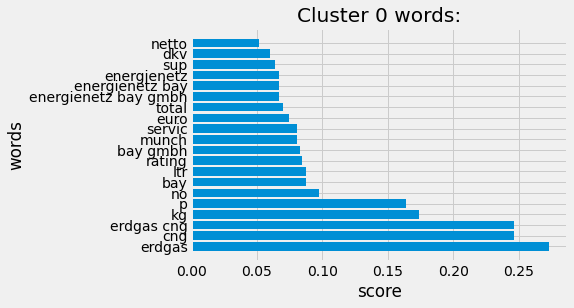

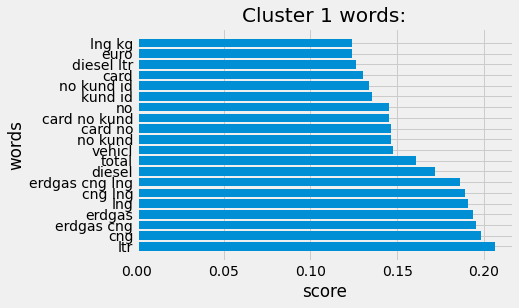

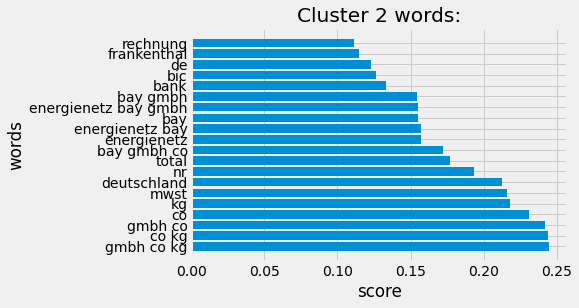

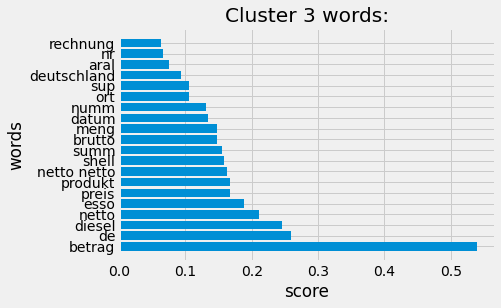

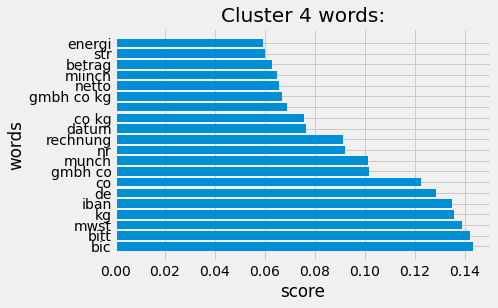

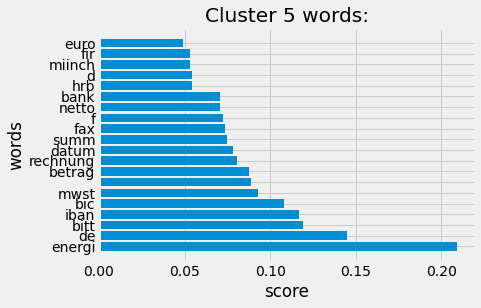

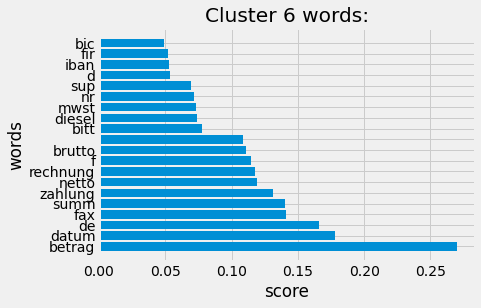

In [207]:
df_train_bgm = get_features_name(tf_idf_array_train,bgm_train_predict,20)
# df_test_bgm = get_features_name(tf_idf_array_test,bgm_test_predict,20)

# fetch the top words and show bar graphs as per their importance
print_words_with_score(df_train_bgm)
# print_words_with_score(df_test_bgm)

In [89]:
# let try naive bayes  mixture

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=7, random_state=42)
bgm.fit(Y_sklearn_pca_train)
bgm_train_predict = bgm.predict(Y_sklearn_pca_train)
bgm_test_predict = bgm.predict(Y_sklearn_pca_test)

In [90]:
bgm_test_predict

array([4, 4, 4, 2, 6, 2, 4, 5, 2, 6, 5, 2, 5, 2, 5, 5, 5, 2, 5, 2, 4, 2,
       5, 5, 2, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 2, 5, 4, 6, 5, 2, 1, 6, 5, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 5,
       1, 2, 3, 6, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 2, 1,
       1, 1, 1, 6, 1, 3, 2, 3, 1, 6, 1, 1, 1, 6, 6, 2, 1, 2, 1, 4, 1, 3,
       1, 1, 5, 3, 6, 1, 5, 1, 0, 1, 0, 3, 1, 6, 1, 2, 6, 1, 6, 1, 1, 1,
       1, 1, 2, 2, 6, 0, 1, 6, 6, 1, 4, 1, 6, 3, 1, 6, 1, 5, 1, 1, 3, 2,
       6, 1, 6, 5, 1, 1, 3, 5, 5, 1, 1, 3, 2, 1, 6, 1, 1, 5, 4, 5, 5, 6,
       5, 4, 5, 5, 5, 5, 5, 5, 2, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6])

In [91]:
df_test_naivebayes = get_features_name(tf_idf_array_train,bgm_train_predict,25)

In [92]:
df_test_naivebayes

[                features     score
 0                 erdgas  0.273307
 1                    cng  0.246447
 2             erdgas cng  0.246447
 3                     kg  0.174138
 4                      p  0.164191
 5                     no  0.097702
 6                    bay  0.087564
 7                    ltr  0.087359
 8                 rating  0.084616
 9               bay gmbh  0.083287
 10                 munch  0.080718
 11                servic  0.080628
 12                  euro  0.074859
 13                 total  0.070359
 14  energienetz bay gmbh  0.067221
 15       energienetz bay  0.067221
 16           energienetz  0.067221
 17                   sup  0.063845
 18                   dkv  0.060258
 19                 netto  0.051471
 20                    id  0.049450
 21                    co  0.045721
 22            no kund id  0.042413
 23          card no kund  0.042413
 24               no kund  0.042413,
           features     score
 0              ltr  0.206116
 1 

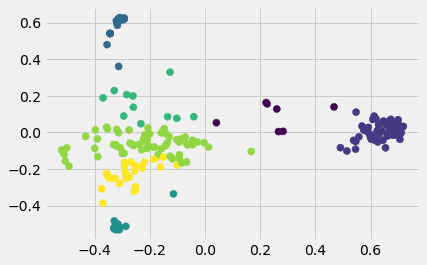

In [97]:
print_clusters(Y_sklearn_pca_test,bgm_test_predict, bgm, center=False)

In [96]:
from sklearn.metrics import accuracy_score, f1_score

In [103]:

#creating lr model for cross validation for other models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
# saga for multiclass and multinomial loss
# C= 10 for inverse of regularization strength , like in svm smaller values stronger regularization
# random state to reuse algo how many times
#multiclass decides data binary multinomail keep it auto

lr = LogisticRegression(n_jobs=2, penalty="l1",
                        multi_class="auto", C=1.0,
                        random_state=500, solver="saga")

# proba_kmeans = cross_val_predict(lr, Y_sklearn_pca_test, kmeans_predict_test, method="predict_proba")
# proba_bayes = cross_val_predict(lr, Y_sklearn_pca_test, bgm_test_predict, method="predict_proba")

In [ ]:
# while the results of clustering seems fine with kmeans in both cases 

In [ ]:
# lda from precomuted distance from dist matrix 

In [198]:
# we will use this in lda
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(Y_sklearn_pca_test)
print(dist_1)

[[ 0.00000000e+00  8.23072395e-01  8.64148649e-01 ...  8.63021924e-01
   1.00000000e+00  1.00000000e+00]
 [ 8.23072395e-01 -2.22044605e-16  9.34615281e-01 ...  9.18919814e-01
   9.41675062e-01  1.00000000e+00]
 [ 8.64148649e-01  9.34615281e-01  1.11022302e-16 ...  9.66961901e-01
   1.00000000e+00  1.00000000e+00]
 ...
 [ 8.63021924e-01  9.18919814e-01  9.66961901e-01 ...  1.11022302e-16
   1.00000000e+00  5.79603908e-01]
 [ 1.00000000e+00  9.41675062e-01  1.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  5.79603908e-01
   1.00000000e+00  0.00000000e+00]]


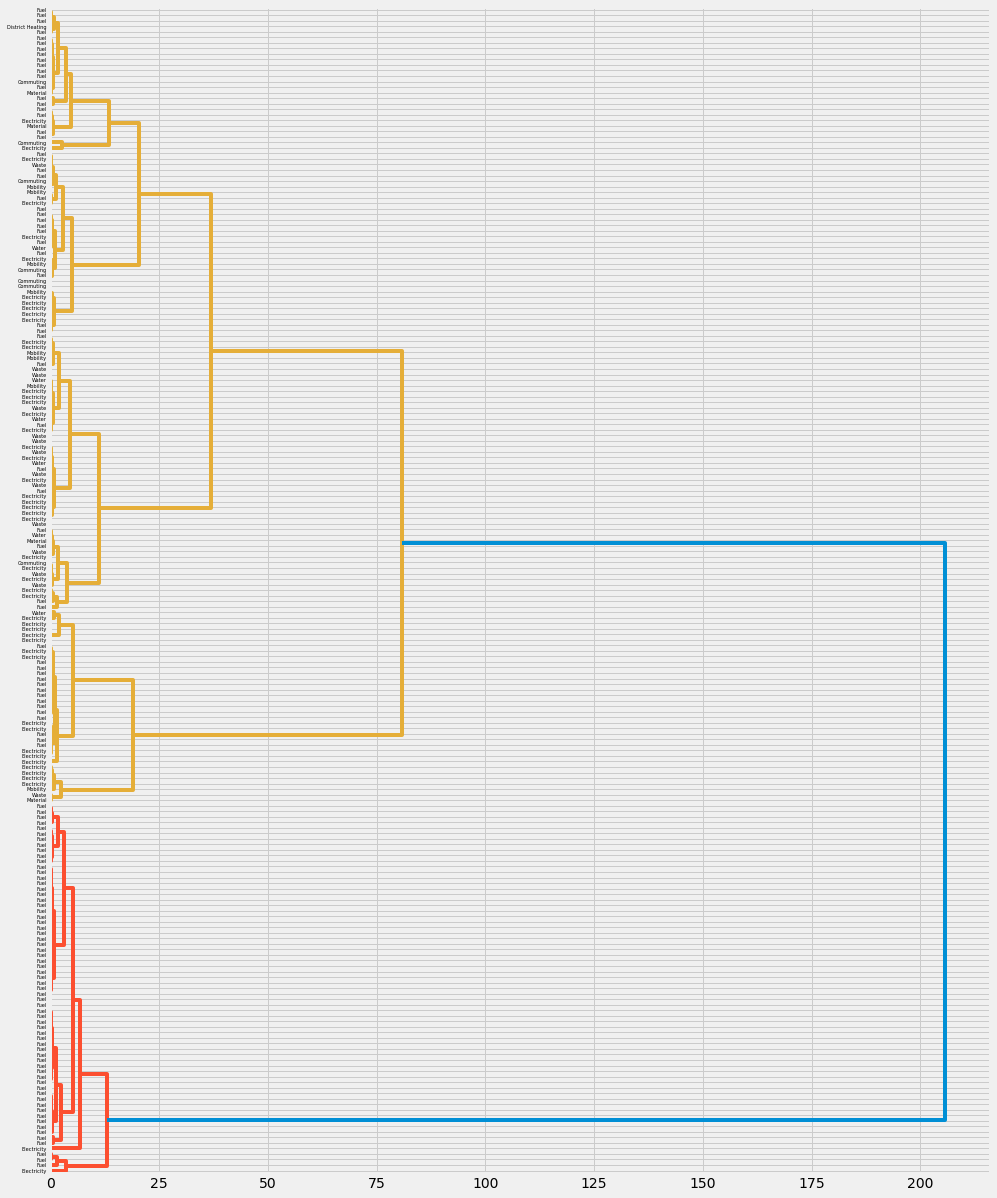

In [199]:
# Hierarchical document clustering
# Ward clustering algorithm : it offers . Ward clustering is an agglomerative clustering method, meaning that at each stage, the pair of clusters with minimum between-cluster distance are merged. I used the precomputed cosine distance matrix (dist)
# to calclate a linkage_matrix, which I then plot as a dendrogram. note diagram shows the it offers 2 main clusters and red cluster is divided into 
# 2 main sub and yellow is divided into 3 main sub cluster
from scipy.cluster.hierarchy import ward, dendrogram

link_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(link_matrix, orientation="right", labels=existing_types_test_set);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.show() #show plot with tight layout

#uncomment below to save figure
# plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [ ]:
# which begs the question does no of cluster provided fits the data or not lets find out best no of cluster fit

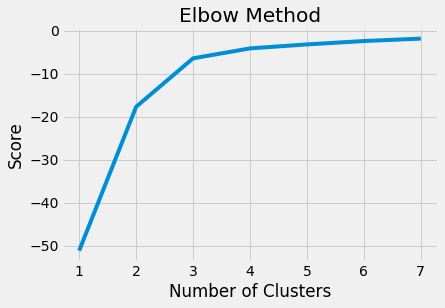

In [146]:
# Optimal Number of Clusters

sklearn_pca = PCA(n_components = 2)
# sklearn_pca = PCA(.95)

# Y_sklearn_pca = sklearn_pca.fit_transform(tf_idf_array)

number_clusters = range(1, 8)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn_pca_test).score(Y_sklearn_pca_test) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [ ]:
#revised kmeans with 4 clusters

In [150]:
km_model_revised = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
# %time km_model.fit(tf_idf_array_train)
%time km_model_revised.fit(Y_sklearn_pca_train)
revised_clusters_train = km_model_revised.labels_.tolist()
kmeans_revised_predict_train = km_model_revised.predict(Y_sklearn_pca_train)
kmeans_revised_predict_test = km_model_revised.predict(Y_sklearn_pca_test)
print(kmeans_revised_predict_test)

CPU times: user 190 ms, sys: 28.9 ms, total: 218 ms
Wall time: 42.6 ms
[3 3 3 1 0 1 3 3 1 3 3 1 3 1 3 3 3 1 3 1 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 0 3 3 3 3 3 3 1 3 1 3 3 1 2 3 3 2 2 2 2 2 1 2 2 2 2 3 2 1 0 3 2 2 1 2
 1 2 2 2 2 2 1 2 2 0 0 2 1 2 2 2 2 0 2 0 1 0 2 3 2 2 2 0 0 1 2 1 2 3 2 0 2
 2 3 0 0 2 3 2 2 2 2 0 2 3 2 1 0 2 0 2 2 2 2 2 1 1 0 2 2 3 0 2 3 2 3 0 2 0
 2 3 2 2 0 1 0 2 0 3 2 2 0 3 3 2 2 0 1 2 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 1
 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3]


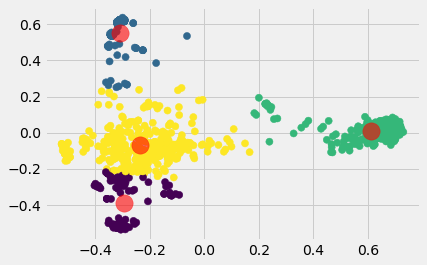

In [151]:
print_clusters(Y_sklearn_pca_train,kmeans_revised_predict_train, km_model_revised, center=True)

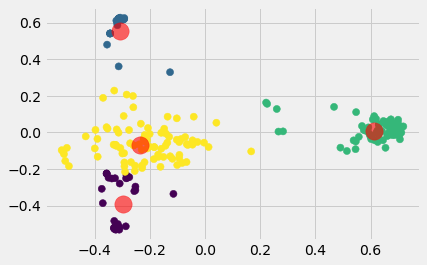

In [152]:
print_clusters(Y_sklearn_pca_test,kmeans_revised_predict_test, km_model_revised, center=True)

Cluster 0 words: 
 ['betrag', 'de', 'summ', 'netto', 'diesel', 'datum', 'brutto', 'esso', 'shell', 'produkt', 'zahlung', 'preis', 'netto netto', 'rechnung', 'meng', 'sup', 'numm', 'deutschland', 'nr', 'fax'] 

Cluster 1 words: 
 ['co kg', 'gmbh co kg', 'gmbh co', 'co', 'mwst', 'kg', 'deutschland', 'nr', 'total', 'bay gmbh co', 'energienetz bay', 'energienetz', 'bay', 'energienetz bay gmbh', 'bay gmbh', 'bic', 'bank', 'de', 'frankenthal', 'rechnung'] 

Cluster 2 words: 
 ['cng', 'erdgas cng', 'erdgas', 'ltr', 'lng', 'cng lng', 'erdgas cng lng', 'diesel', 'total', 'vehicl', 'no kund', 'no', 'card no', 'card no kund', 'kund id', 'no kund id', 'card', 'kg', 'euro', 'diesel ltr'] 

Cluster 3 words: 
 ['energi', 'de', 'bitt', 'iban', 'bic', 'datum', 'mwst', 'betrag', '  ', 'rechnung', 'fax', 'netto', 'f', 'summ', 'bank', 'd', 'miinch', 's', 'nr', 'zahlung'] 



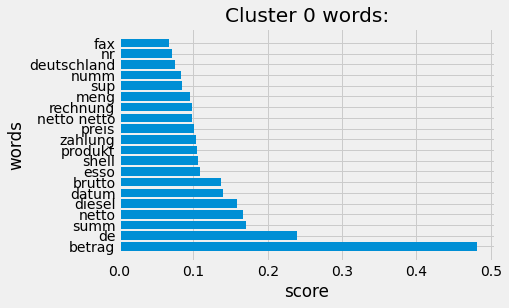

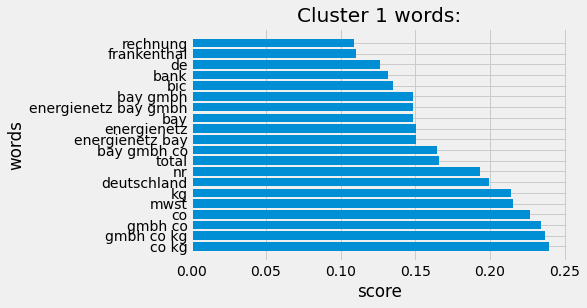

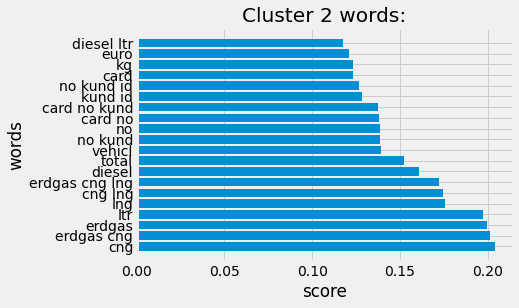

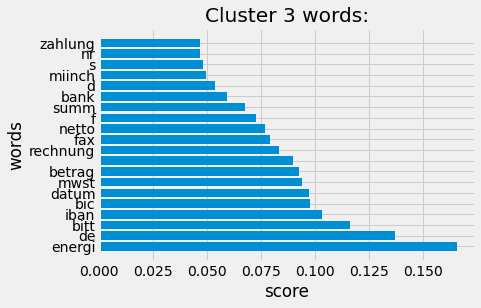

In [200]:
#top terms: 20
df_train_kmeans_revised = get_features_name(tf_idf_array_train,kmeans_revised_predict_train,20)
# fetch the top words and show bar graphs as per their importance
print_words_with_score(df_train_kmeans_revised)

In [156]:
#revised naive bayes

bgm_revise = BayesianGaussianMixture(n_components=4, random_state=42)
bgm_revise.fit(Y_sklearn_pca_train)
bgm_revise_train_predict = bgm_revise.predict(Y_sklearn_pca_train)
bgm_revise_test_predict = bgm_revise.predict(Y_sklearn_pca_test)

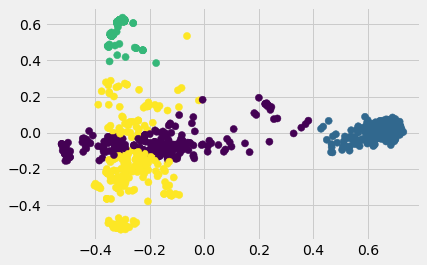

In [157]:
print_clusters(Y_sklearn_pca_train,bgm_revise_train_predict, bgm_revise, center=False)

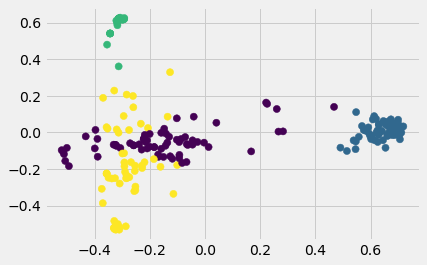

In [158]:
print_clusters(Y_sklearn_pca_test,bgm_revise_test_predict, bgm_revise, center=False)

Cluster 0 words: 
 ['energi', 'de', 'iban', 'bitt', 'bic', '  ', 'mwst', 'datum', 'f', 'rechnung', 'betrag', 'summ', 'fax', 'netto', 'bank', 'euro', 'd', 'p', 'hrb', 'munch'] 

Cluster 1 words: 
 ['ltr', 'cng', 'erdgas cng', 'erdgas', 'lng', 'cng lng', 'erdgas cng lng', 'diesel', 'total', 'vehicl', 'no kund', 'card no', 'card no kund', 'no', 'kund id', 'no kund id', 'card', 'diesel ltr', 'euro', 'lng kg'] 

Cluster 2 words: 
 ['gmbh co kg', 'co kg', 'gmbh co', 'co', 'mwst', 'kg', 'deutschland', 'nr', 'total', 'bay gmbh co', 'energienetz bay gmbh', 'energienetz bay', 'energienetz', 'bay gmbh', 'bay', 'bank', 'bic', 'de', 'frankenthal', 'rechnung'] 

Cluster 3 words: 
 ['betrag', 'de', 'datum', 'netto', 'summ', 'diesel', 'brutto', 'rechnung', 'zahlung', 'bitt', 'nr', 'fax', 'preis', '  ', 'mwst', 'esso', 'iban', 'bic', 'f', 'sup'] 



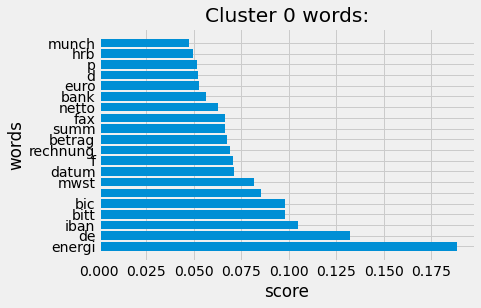

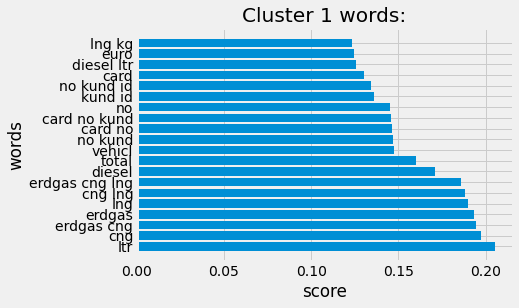

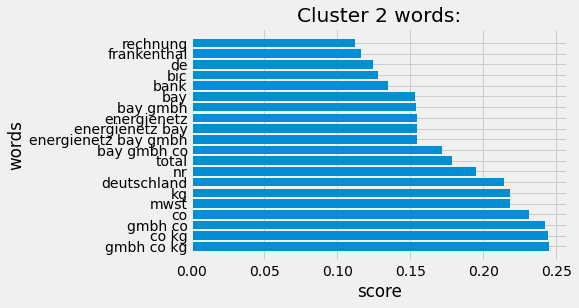

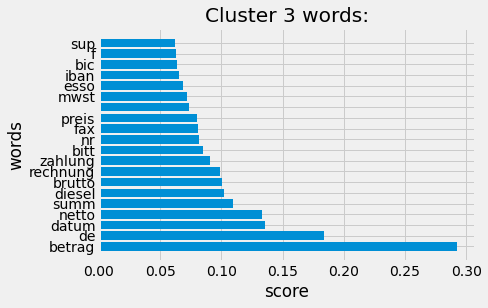

In [201]:
#top terms: 20
df_train_bgm_revised = get_features_name(tf_idf_array_train,bgm_revise_train_predict,20)
# fetch the top words and show bar graphs as per their importance
print_words_with_score(df_train_bgm_revised)

In [159]:
proba_kmeans_revised = cross_val_predict(lr, Y_sklearn_pca_test, kmeans_revised_predict_test, method="predict_proba")
proba_bayes_revised = cross_val_predict(lr, Y_sklearn_pca_test, bgm_revise_test_predict, method="predict_proba")

In [161]:
print(accuracy_score(kmeans_revised_predict_test, proba_kmeans_revised.argmax(axis=1)))
print(f1_score(kmeans_revised_predict_test, proba_kmeans_revised.argmax(axis=1), average='weighted'))
print(f1_score(kmeans_revised_predict_test, proba_kmeans_revised.argmax(axis=1), average='macro'))
print(f1_score(kmeans_revised_predict_test, proba_kmeans_revised.argmax(axis=1), average='micro'))

0.9478672985781991
0.9441567820786133
0.9266864881177557
0.9478672985781991


In [162]:
print(accuracy_score(bgm_revise_test_predict, proba_bayes_revised.argmax(axis=1)))
print(f1_score(bgm_revise_test_predict, proba_bayes_revised.argmax(axis=1), average='weighted'))
print(f1_score(bgm_revise_test_predict, proba_bayes_revised.argmax(axis=1), average='macro'))
print(f1_score(bgm_revise_test_predict, proba_bayes_revised.argmax(axis=1), average='micro'))

0.8388625592417062
0.835694783940841
0.8606601162953622
0.8388625592417062


In [202]:
import numpy as np
import pandas as pd
from numpy import where
from numpy import unique

data_train = {'title': hash_training_set, 'existing_types': existing_types_training_set, 'doc_text':text_training_set, 'clusters_kmeans': kmeans_predict_train, 'clusters_bayes': bgm_train_predict }
data_test = {'title': hash_test_set, 'existing_types': existing_types_test_set, 'doc_text':text_test_set, 'clusters_kmeans': kmeans_predict_test, 'clusters_bayes': bgm_test_predict }

frame_training_set = pd.DataFrame(data_train, index = [hash_training_set] , columns = ['existing_types', 'clusters_kmeans', 'clusters_bayes'])
frame_test_set = pd.DataFrame(data_test, index = [hash_test_set] , columns = ['existing_types', 'clusters_kmeans', 'clusters_bayes'])

#prepare dataset for kmeans and naive bayes with previously allocated types

data_train_revised = {'title': hash_training_set, 'existing_types': existing_types_training_set, 'doc_text':text_training_set, 'clusters_kmeans_revised': kmeans_revised_predict_train, 'clusters_bayes_revised': bgm_revise_train_predict }
data_test_revised = {'title': hash_test_set, 'existing_types': existing_types_test_set, 'doc_text':text_test_set, 'clusters_kmeans_revised': kmeans_revised_predict_test, 'clusters_bayes_revised': bgm_revise_test_predict }

frame_training_set_revised = pd.DataFrame(data_train_revised, index = [hash_training_set] , columns = ['existing_types', 'clusters_kmeans_revised', 'clusters_bayes_revised'])
frame_test_set_revised = pd.DataFrame(data_test_revised, index = [hash_test_set] , columns = ['existing_types',  'clusters_kmeans_revised', 'clusters_bayes_revised'])


In [163]:
# lets make a data frame with train data by adding clusters and also for test data


data_train = {'title': hash_training_set, 'existing_types': existing_types_training_set, 'doc_text':text_training_set, 'clusters_kmeans': kmeans_predict_train, 'clusters_bayes': bgm_train_predict, 'clusters_kmeans_revised': kmeans_revised_predict_train, 'clusters_bayes_revised': bgm_revise_train_predict }
data_test = {'title': hash_test_set, 'existing_types': existing_types_test_set, 'doc_text':text_test_set, 'clusters_kmeans': kmeans_predict_test, 'clusters_bayes': bgm_test_predict, 'clusters_kmeans_revised': kmeans_revised_predict_test, 'clusters_bayes_revised': bgm_revise_test_predict }

frame_training_set = pd.DataFrame(data_train, index = [hash_training_set] , columns = ['existing_types', 'clusters_kmeans', 'clusters_bayes', 'clusters_kmeans_revised', 'clusters_bayes_revised'])
frame_test_set = pd.DataFrame(data_test, index = [hash_test_set] , columns = ['existing_types', 'clusters_kmeans', 'clusters_bayes', 'clusters_kmeans_revised', 'clusters_bayes_revised'])


In [165]:
clustercompar

,existing_types,clusters_kmeans,clusters_bayes,clusters_kmeans_revised,clusters_bayes_revised
5f3de360ad07c434a5a2cbd32096a960571669ea3c5c35eb6a9164354fc18ff3,Electricity,6,4,3,3
80229bee8f2759cf66ab679db2fa01482842efc80924a7643900d93e2e923f23,Electricity,6,4,3,3
c264a72f7d0774b56584f1c792e32a8aed4eb7d7484260cd0b283ff15999022f,Electricity,6,4,3,0
d62977a37476e2b68bf17a24ed42138026bf95819d8a785c29d6da150da8d4e1,Electricity,2,2,1,2
026a58b33021007a26c9c8378fbc2b8c8f0645f2f8f9b68b64b38512e407ef93,Electricity,5,6,0,3
...,...,...,...,...,...
407254d0ddd2d6dac82efb5274ee7af490479f3ce2c5591e6d4e29fd97429b96,Commuting,5,6,3,3
02518ae8fd91edfb0a4ea12b56bb63b93ce44dd88068c03212ab6674686e48e7,Commuting,1,5,3,0
8a2a8a17a6c6150c834eeebcab060d8e7da2e37ebbe9883d6092f2861c664708,Commuting,1,5,3,0
f132ac21041fda93b0d10b0906e8836954f8a51ef6a84741361e92bed74524a4,Commuting,1,6,3,3


In [208]:
# frame_test_set[frame_test_set.clusters == 1]
print(frame_training_set['clusters_kmeans'].value_counts(), frame_training_set['clusters_bayes'].value_counts())
print(frame_test_set['clusters_kmeans'].value_counts(), frame_test_set['clusters_bayes'].value_counts())

3    342
2    247
1    118
0    116
Name: clusters_kmeans_revised, dtype: int64 3    247
0    239
1    228
2    109
Name: clusters_bayes_revised, dtype: int64
3    91
2    65
0    28
1    27
Name: clusters_kmeans_revised, dtype: int64 0    69
1    59
3    57
2    26
Name: clusters_bayes_revised, dtype: int64


In [183]:
frame_training_set[frame_training_set.clusters_kmeans_revised == 3]

,existing_types,clusters_kmeans,clusters_bayes,clusters_kmeans_revised,clusters_bayes_revised
e0cf20a41aa45290bcc99aaa1e4252249b59b1ee75fa18b5984b25a43718e6ba,Electricity,6,4,3,0
34c317e6e1cb6eefdc57e6fd30217eb210068c8eadb586d5e823f50e1c990ca8,Electricity,1,5,3,0
17e88b257653c61df57daf7a20aa3af659d11a41d35576049c72e3d60fcb63fc,Electricity,1,5,3,3
ea7431eb41cad415cc69a20eff18be8486127ee1c6cf1fee863f4b1b36f2b63f,Electricity,1,5,3,0
88d5b51f88c9881c5fc306665770e941836fa8d515c837ded0c848a0a3ef6a14,Electricity,1,5,3,0
...,...,...,...,...,...
cae5286de4e84f450badd78963f3a6f220d09895d8a6039f46a39cbcf4a4c4a1,Commuting,3,0,3,0
e9385b9171c650d0f8adbafe178d22a4f6daeb512526901e6b98b3cd4598315a,Commuting,5,5,3,0
5114f97706e6a79c758ac82d41022ca022ee384d4628f806f0e5479a905b6eb1,Commuting,1,6,3,3
b1d0069590fa48efdf88dfbcf98f1b5f3956606ddb1a29ece5851e558ae7135e,Commuting,1,5,3,0


In [210]:
#train set
proba_kmeans_train = cross_val_predict(lr, Y_sklearn_pca_train, kmeans_predict_train, method="predict_proba")

#test set
proba_kmeans_test = cross_val_predict(lr, Y_sklearn_pca_test, kmeans_predict_test, method="predict_proba")

print(accuracy_score(kmeans_predict_train, proba_kmeans_train.argmax(axis=1)))
print(f1_score(kmeans_predict_train, proba_kmeans_train.argmax(axis=1), average='weighted'))
print(f1_score(kmeans_predict_train, proba_kmeans_train.argmax(axis=1), average='macro'))
print(f1_score(kmeans_predict_train, proba_kmeans_train.argmax(axis=1), average='micro'))

print(accuracy_score(kmeans_predict_test, proba_kmeans_test.argmax(axis=1)))
print(f1_score(kmeans_predict_test, proba_kmeans_test.argmax(axis=1), average='weighted'))
print(f1_score(kmeans_predict_test, proba_kmeans_test.argmax(axis=1), average='macro'))
print(f1_score(kmeans_predict_test, proba_kmeans_test.argmax(axis=1), average='micro'))

0.9416767922235723
0.9379967127144246
0.896320565980694
0.9416767922235723
0.8672985781990521
0.8176037696516297
0.6606822885147782
0.8672985781990521


In [215]:
#train set
proba_bgm_train = cross_val_predict(lr, Y_sklearn_pca_train, bgm_train_predict, method="predict_proba")



print(accuracy_score(bgm_train_predict, proba_bgm_train.argmax(axis=1)))
print(f1_score(bgm_train_predict, proba_bgm_train.argmax(axis=1), average='weighted'))
print(f1_score(bgm_train_predict, proba_bgm_train.argmax(axis=1), average='macro'))
print(f1_score(bgm_train_predict, proba_bgm_train.argmax(axis=1), average='micro'))

#test set
proba_bgm_test = cross_val_predict(lr, Y_sklearn_pca_test, bgm_test_predict, method="predict_proba")
print(accuracy_score(bgm_test_predict, proba_bgm_test.argmax(axis=1)))
print(f1_score(bgm_test_predict, proba_bgm_test.argmax(axis=1), average='weighted'))
print(f1_score(bgm_test_predict, proba_bgm_test.argmax(axis=1), average='macro'))
print(f1_score(bgm_test_predict, proba_bgm_test.argmax(axis=1), average='micro'))

0.9295261239368166
0.9258868095706997
0.8883284038114848
0.9295261239368166
0.8199052132701422
0.7726974911315627
0.6052385642831293
0.8199052132701422


In [213]:
#train set
proba_kmeans_train_revised = cross_val_predict(lr, Y_sklearn_pca_train, kmeans_revised_predict_train, method="predict_proba")
print(accuracy_score(kmeans_revised_predict_train, proba_kmeans_train_revised.argmax(axis=1)))
print(f1_score(kmeans_revised_predict_train, proba_kmeans_train_revised.argmax(axis=1), average='weighted'))
print(f1_score(kmeans_revised_predict_train, proba_kmeans_train_revised.argmax(axis=1), average='macro'))
print(f1_score(kmeans_revised_predict_train, proba_kmeans_train_revised.argmax(axis=1), average='micro'))

#test set
proba_kmeans_test_revised = cross_val_predict(lr, Y_sklearn_pca_test, kmeans_revised_predict_test, method="predict_proba")
print(accuracy_score(kmeans_revised_predict_test, proba_kmeans_test_revised.argmax(axis=1)))
print(f1_score(kmeans_revised_predict_test, proba_kmeans_test_revised.argmax(axis=1), average='weighted'))
print(f1_score(kmeans_revised_predict_test, proba_kmeans_test_revised.argmax(axis=1), average='macro'))
print(f1_score(kmeans_revised_predict_test, proba_kmeans_test_revised.argmax(axis=1), average='micro'))

0.9720534629404617
0.9719017989579976
0.9669367201109602
0.9720534629404617
0.9478672985781991
0.9441567820786133
0.9266864881177557
0.9478672985781991


In [218]:
#train set
proba_bgm_train_revised = cross_val_predict(lr, Y_sklearn_pca_train, bgm_revise_train_predict, method="predict_proba")
print(accuracy_score(bgm_revise_train_predict, proba_bgm_train_revised.argmax(axis=1)))
print(f1_score(bgm_revise_train_predict, proba_bgm_train_revised.argmax(axis=1), average='weighted'))
print(f1_score(bgm_revise_train_predict, proba_bgm_train_revised.argmax(axis=1), average='macro'))
print(f1_score(bgm_revise_train_predict, proba_bgm_train_revised.argmax(axis=1), average='micro'))

#test set
proba_bgm_test_revised = cross_val_predict(lr, Y_sklearn_pca_test, bgm_revise_test_predict, method="predict_proba")
print(accuracy_score(bgm_revise_test_predict, proba_bgm_test_revised.argmax(axis=1)))
print(f1_score(bgm_revise_test_predict, proba_bgm_test_revised.argmax(axis=1), average='weighted'))
print(f1_score(bgm_revise_test_predict, proba_bgm_test_revised.argmax(axis=1), average='macro'))
print(f1_score(bgm_revise_test_predict, proba_bgm_test_revised.argmax(axis=1), average='micro'))

0.8432563791008505
0.8425147841968266
0.8658690390051049
0.8432563791008506
0.8388625592417062
0.835694783940841
0.8606601162953622
0.8388625592417062


In [132]:
## below method can be ignored it is used for the referece in comprasion of ward method

# Latent Dirichlet Allocation
# strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
# pip install gensim
import gensim
#Latent Dirichlet Allocation implementation with Gensim
from gensim import corpora, models, similarities 

def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

# strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

def prep_text(texts):
    preprocess = [strip_proppers(text) for text in texts]
    tokenized_text = [tokenzier_and_stemmer(text) for text in preprocess]
    texts = [[word for word in text if word not in stop_words] for text in tokenized_text]
    return texts

In [133]:

#remove proper names
preprocess = [strip_proppers(text) for text in text_training_set]
%time tokenized_text = [tokenzier_and_stemmer(text) for text in preprocess]
%time texts = [[word for word in text if word not in stop_words] for text in tokenized_text]

CPU times: user 16.9 s, sys: 1.82 s, total: 18.8 s
Wall time: 18.8 s
CPU times: user 13.8 ms, sys: 535 µs, total: 14.3 ms
Wall time: 15.4 ms


In [134]:
print(len(texts[0]))

29


In [135]:
text_train = prep_text(text_training_set)
text_test = prep_text(text_test_set)

In [136]:
# creating dictionary for LDA
dictionary = corpora.Dictionary(text_train)
dictionary.filter_extremes(no_below=1, no_above=0.8)
# Preparing corpus from dictionary
corpus_train = [dictionary.doc2bow(text) for text in text_train]
corpus_test = [dictionary.doc2bow(text) for text in text_test]

In [137]:
lda = models.LdaModel(corpus_train, num_topics=7, id2word=dictionary, update_every=5, chunksize=10000, passes=100)


In [140]:
topics = lda.print_topics(7, num_words=20)
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix, dtype=object)
topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

["('cng', 0.033044863)", "('ltr', 0.03303909)", "('erdgas', 0.032843586)", "('diesel', 0.029678073)", "('lng', 0.029657539)", "('total', 0.029567482)", "('kg', 0.025639893)", "('kund', 0.022936651)", "('no', 0.022754002)", "('card', 0.022619639)", "('vehicl', 0.02253557)", "('euro', 0.021799346)", "('id', 0.021138204)", "('sup', 0.018172923)", "('omv', 0.017866557)", "('aral', 0.013676896)", "('shell', 0.013300644)", "('p', 0.01270276)", "('rating', 0.012206545)", "('st', 0.011362647)"]

["('stk', 0.016784567)", "('transport', 0.012387971)", "('verwert', 0.010125648)", "('kw', 0.0082847765)", "('t', 0.0073676645)", "('m', 0.007076696)", "('aufbereit', 0.006711813)", "('x', 0.0057226205)", "('de', 0.0052190507)", "('ug', 0.0050022383)", "('g', 0.004813123)", "('netto', 0.0047684168)", "('el', 0.004660123)", "('information', 0.0046509635)", "('vertrag', 0.004629066)", "('abfall', 0.0045915684)", "('entsorg', 0.0045883693)", "('verbrauch', 0.00428524)", "('friedrichsstrar', 0.004181404)",